<a href="https://colab.research.google.com/github/ehsan94/Deep-Learning/blob/master/Deutschland_COVID_19_(SHAP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Covid-19 (SHAP)**




# Data 0 to 75

In [10]:
%pip install shap
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import shap

In [3]:
df = pd.read_stata('/content/std_inz75_91.dta')


One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.


In [4]:
Y = df['std_inz_75to91']
X = df.loc[:, ~df.columns.isin(['std_inz_75to91', 'eastwest'])]

In [ ]:
rf = RandomForestRegressor( random_state=0, n_estimators=5000, max_features = "auto")
rf.fit(X, Y) 

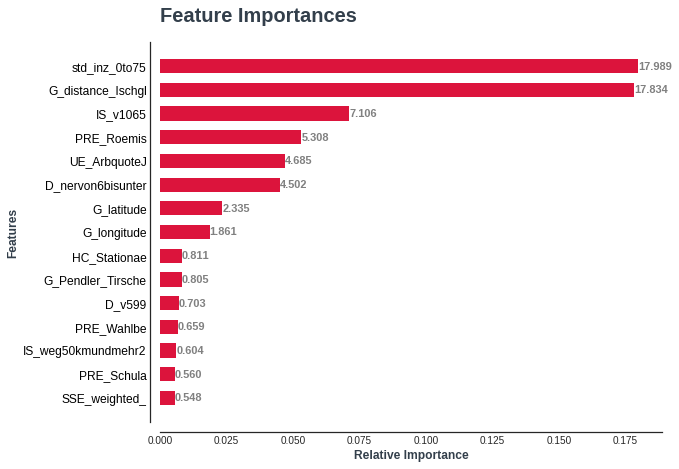

In [19]:
importances = rf.feature_importances_
indices = np.argsort(importances)
features = X.columns
fig, ax = plt.subplots(figsize=(9,7))
plt.style.use('seaborn-white')
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
for s in ['top','right']:
    ax.spines[s].set_visible(False)
    
idx = np.argsort(importances)[-15:][::-1]
plt.title('Feature Importances',loc='left', pad=20, color = '#333F4B', fontweight='black',fontsize=20)
plt.barh(range(len(idx)), importances[idx],  0.60 ,color='crimson', align='center')

plt.yticks(range(len(idx)), [features[i] for i in idx], color='black',fontsize=12)
plt.xlabel('Relative Importance',fontsize=12, fontweight='black', color = '#333F4B')
plt.ylabel('Features',fontsize=12, fontweight='black', color = '#333F4B')
plt.gca().invert_yaxis()

for index, value in enumerate(importances[idx]):
    plt.text(value, index, str(format(value*100, ".3f")),  ha='left',va='center',fontsize=11 ,fontweight='bold', color='grey')




In [ ]:
explainer = shap.KernelExplainer(rf.predict,X)

In [ ]:
shap_values = explainer.shap_values(X, nsamples=100)

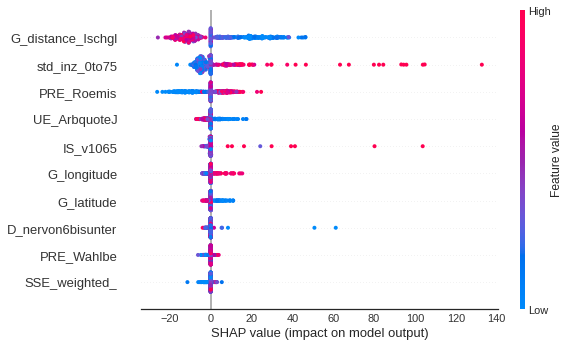

In [23]:
shap.summary_plot(shap_values, X ,max_display=10)

# **WEST Germany**

In [3]:
df = pd.read_stata('/content/std_inz75_91.dta')


One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.


In [4]:
df = df[df['eastwest'] == 1.0]

In [5]:
Y = df['std_inz_75to91']
X = df.loc[:, ~df.columns.isin(['std_inz_75to91'])]

In [6]:
rf = RandomForestRegressor( random_state=0, n_estimators=5000, max_features = "auto")
rf.fit(X, Y)  

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

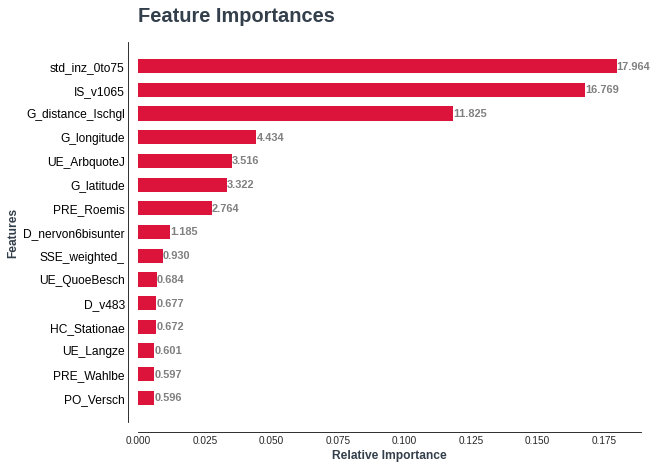

In [7]:
importances = rf.feature_importances_
indices = np.argsort(importances)
features = X.columns
fig, ax = plt.subplots(figsize=(9,7))
plt.style.use('seaborn-white')
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
for s in ['top','right']:
    ax.spines[s].set_visible(False)
    
idx = np.argsort(importances)[-15:][::-1]
plt.title('Feature Importances',loc='left', pad=20, color = '#333F4B', fontweight='black',fontsize=20)
plt.barh(range(len(idx)), importances[idx],  0.60 ,color='crimson', align='center')

plt.yticks(range(len(idx)), [features[i] for i in idx], color='black',fontsize=12)
plt.xlabel('Relative Importance',fontsize=12, fontweight='black', color = '#333F4B')
plt.ylabel('Features',fontsize=12, fontweight='black', color = '#333F4B')
plt.gca().invert_yaxis()

for index, value in enumerate(importances[idx]):
    plt.text(value, index, str(format(value*100, ".3f")),  ha='left',va='center',fontsize=11 ,fontweight='bold', color='grey')



In [ ]:
explainer = shap.KernelExplainer(rf.predict,X)

In [ ]:
shap_values = explainer.shap_values(X, nsamples=100)

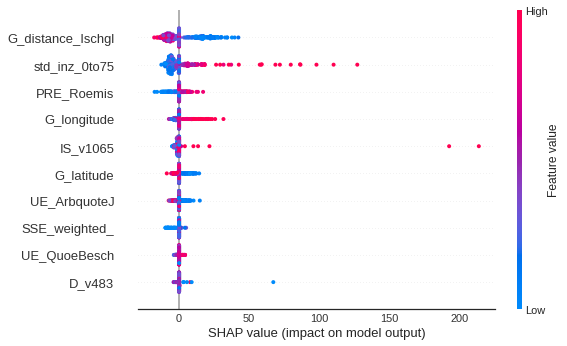

In [11]:
shap.summary_plot(shap_values, X,max_display=10)

# **East Germany**

In [ ]:
df = pd.read_stata('/content/std_inz75_91.dta')


In [34]:
df = df[df['eastwest'] == 0.0]
Y = df['std_inz_75to91']
X = df.loc[:, ~df.columns.isin(['std_inz_75to91'])]

In [35]:
rf = RandomForestRegressor(random_state=0, n_estimators=5000)
rf.fit(X, Y) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

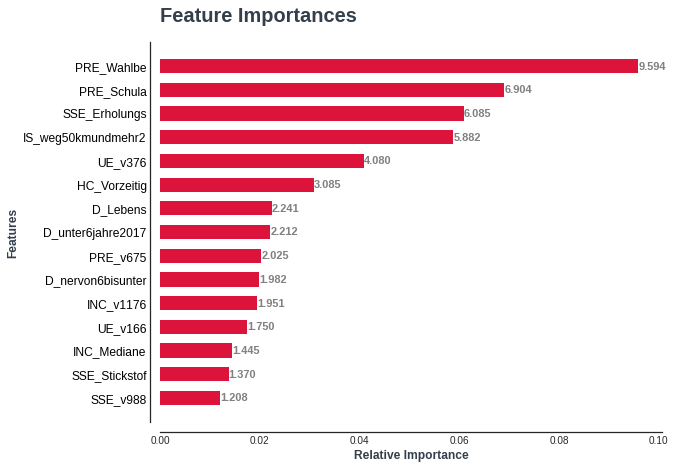

In [39]:
importances = rf.feature_importances_
indices = np.argsort(importances)
features = X.columns
fig, ax = plt.subplots(figsize=(9,7))
plt.style.use('seaborn-white')
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
for s in ['top','right']:
    ax.spines[s].set_visible(False)
    
idx = np.argsort(importances)[-15:][::-1]
plt.title('Feature Importances',loc='left', pad=20, color = '#333F4B', fontweight='black',fontsize=20)
plt.barh(range(len(idx)), importances[idx],  0.60 ,color='crimson', align='center')

plt.yticks(range(len(idx)), [features[i] for i in idx], color='black',fontsize=12)
plt.xlabel('Relative Importance',fontsize=12, fontweight='black', color = '#333F4B')
plt.ylabel('Features',fontsize=12, fontweight='black', color = '#333F4B')
plt.gca().invert_yaxis()

for index, value in enumerate(importances[idx]):
    plt.text(value, index, str(format(value*100, ".3f")),  ha='left',va='center',fontsize=11 ,fontweight='bold', color='grey')


In [36]:
explainer = shap.KernelExplainer(rf.predict,X)

In [ ]:
shap_values = explainer.shap_values(X, nsamples=100)

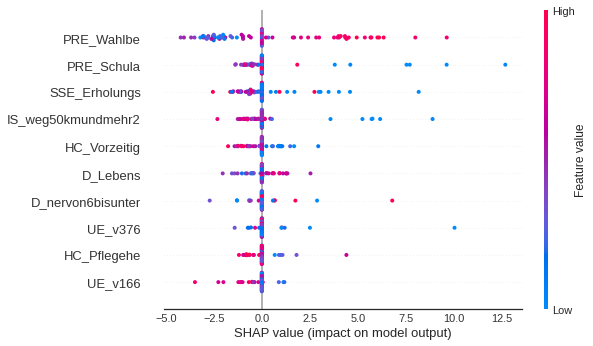

In [38]:
shap.summary_plot(shap_values, X,max_display=10)